<a href="https://colab.research.google.com/github/Tomoki-Ishikura/lecture_infosys/blob/main/OptimComplexFun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import root

WorkDir=os.getcwd() #現在の絶対パスを取得
# os.chdir('Inputs2_ImportMix')


<a list of 10 text.Text objects>

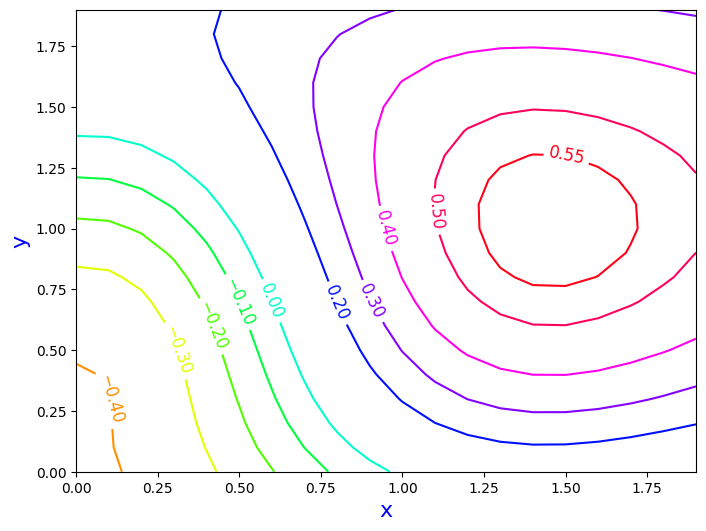

In [ ]:
"""
まずは，複雑な形状の関数を描画する
この描画は，最適化計算においては不要．関数の形状を可視化するのみ
"""


x=np.arange(0,2,0.1)
# 0から1.9まで0.1間隔の50個の要素を持つアレイ（ベクトル）を作成
y=x # 同じサイズのアレイ（ベクトル）をコピーにより作成

# 格子点の作成
X, Y = np.meshgrid(x, y)

# 関数の計算式
# F0 = (X-1)*np.exp(-(X-0.5)**2-(Y-0.7)**2)-0.05*(X-10)-(0.3*((Y-1.2)**2))
F0 = (np.exp(- (X - 1/2)**2 - (Y - 7/10)**2))*(X - 1) - (3*(Y - 6/5)**2)/10 - X/20 + 1/2 # 分数で係数を表記

# 曲面を描画(カラーマップは'plasma_r')
# ax.plot_surface(X, Y, F0, cmap = "hsv")

# Figure3を作成
fig1 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax1 = fig1.add_subplot()
# 軸ラベルを設定
ax1.set_xlabel("x", size = 16, color = "blue")
ax1.set_ylabel("y", size = 16, color = "blue")

# 等高線を描く高度
hight = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.2, 0.3, 0.4, 0.5, 0.55]

# 等高線をプロット(カラーマップはhsv)
cont = ax1.contour(X, Y, F0, cmap = "hsv", levels = hight )

# 等高線ラベルを設定
ax1.clabel(cont, fontsize = 12)

In [ ]:
N_Iteration=50 # 繰り返し計算の上限値

Record=np.zeros((N_Iteration,3)) # 途中の計算を記録する行列（要素は全て0）を作成

# Step 0
x=1.1
y=0.5

print('最急降下法：収束計算途中の(x, y, F)を画面出力させていきます')

for I in range(N_Iteration):
    # Step 1 現在の解候補点での関数評価
    # # 関数の計算式
    F = (np.exp(- (x - 1/2)**2 - (y - 7/10)**2))*(x - 1) - (3*(y - 6/5)**2)/10 - x/20 + 1/2 # 分数で係数を表記

    Record[I,:]=[x,y,F] # 途中の計算結果を記録していく，(x,y)座標と，関数の評価値F

    # Step 2 勾配ベクトルの計算(解の更新方向）の計算
    dx= np.exp(- (x - 1/2)**2 - (y - 7/10)**2) - np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*x - 1)*(x - 1) - 1/20
    dy= 18/25 - np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*y - 7/5)*(x - 1) - (3*y)/5
    Grad=np.array((dx, dy))

    # LengVec=np.linalg.norm(Grad) # 勾配ベクトルの長さ：ノルム
    Manual=np.sqrt(dx**2+dy**2) # 手計算で勾配ベクトルの長さを計算
    # print(LengVec)
    # print(Manual)

    # Step 2.5 勾配ベクトルがゼロベクトルか判定
    if Manual<0.1: # 勾配ベクトルのノルムが0.1より小さければ，収束したと判断（実際にはもっと小さな値が望ましい）
      print('おめでとう! %d 回目で収束しました' % I)
      print('最適解と最適値は')
      print(Record[I,:])
      break
    else:
      print(Record[I,:])


    # 最急降下法のステップ幅 0.1
    # Step 3 次の解候補（座標）を決める
    x=x+ 0.1*dx
    y=y+ 0.1*dy
# ここまでで，繰り返し計算は終了

最急降下法：収束計算途中の(x, y, F)を画面出力させていきます
[1.1      0.5      0.365032]
[1.15398816 0.54468128 0.41147602]
[1.19981551 0.58704491 0.44818659]
[1.23839674 0.62655327 0.47688495]
[1.27075614 0.66297923 0.49921872]
[1.29787762 0.69630573 0.51659378]
[1.32063616 0.72664383 0.53014057]
[1.33977781 0.75417452 0.54074017]
[1.35592412 0.77911075 0.54906873]
[1.36958671 0.80167419 0.55564188]
[1.38118436 0.82208184 0.5608524 ]
[1.39105943 0.8405388  0.56500018]
[1.39949213 0.85723492 0.56831504]
[1.40671243 0.87234364 0.57097395]
[1.41290975 0.88602211 0.57311392]
[1.41824076 0.89841199 0.57484155]
[1.42283559 0.90964062 0.57624022]
おめでとう! 17 回目で収束しました
最適解と最適値は
[1.42680283 0.91982226 0.57737548]


<a list of 10 text.Text objects>

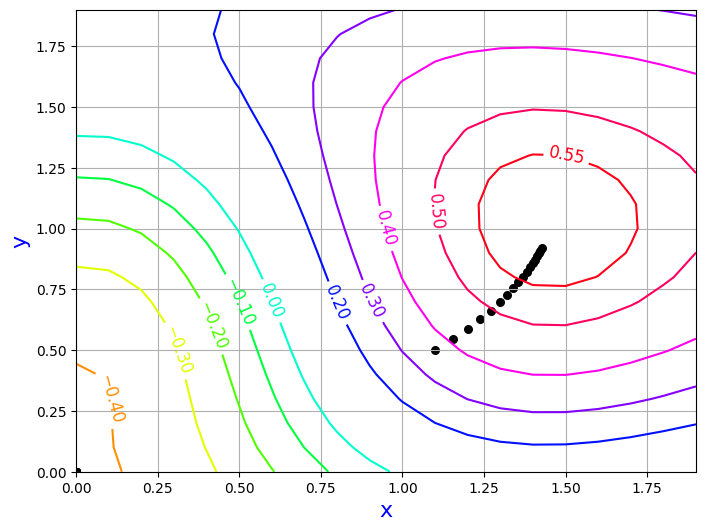

In [ ]:
"""
このブロックは結果のまとめの図示
プロットは計算の経過を可視化するためなので，最適化計算には直接関係しません．
ですので，ここは実行しなくても計算結果に影響がありません．
"""

# 計算過程で保存しておいたx, y, Fの値をRecord変数から取り出す．
x_result=Record[:,0]
y_result=Record[:,1]
F_result=Record[:,2]

# グラフを表示する準備
fig3 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax3 = fig3.add_subplot()
# 軸ラベルを設定，ラベルの文字とフォントサイズと色
ax3.set_xlabel("x", size = 16, color = "blue")
ax3.set_ylabel("y", size = 16, color = "blue")

ax3.grid() # 罫線

Scat = ax3.scatter(x_result,y_result, c='k', s=30) # 繰り返し計算の軌跡, cはカラー, sはポイントの大きさ
Cont2 = ax3.contour(X, Y, F0, cmap = "hsv", levels = hight) # 関数の等高線
# 等高線ラベルを設定
ax3.clabel(Cont2, fontsize = 12)

In [ ]:
"""
ニュートン法の場合
初期点として，(x_0,y_0)を選ぶ
初期点が最適解から離れていると失敗することがある．
最適解の近傍からスタートすると収束が速い
"""
print('ニュートン法：収束計算途中の(x, y, F)を画面出力させていきます')

RecordNewton=np.zeros((N_Iteration,3)) # 途中の計算を記録する行列（要素は全て0）を作成

# Step 0
x=1.1
y=0.5

for I in range(N_Iteration):
    # Step 1 現在の解候補点での関数評価
    # # 関数の計算式
    # F = (X-1)*np.exp(-(X-0.5)**2-(Y-0.7)**2)-0.05*(X-10)-(0.3*((Y-1.2)**2))
    F = (np.exp(- (x - 1/2)**2 - (y - 7/10)**2))*(x - 1) - (3*(y - 6/5)**2)/10 - x/20 + 1/2 # 分数で係数を表記

    RecordNewton[I,:]=[x,y,F] # 途中の計算結果を記録していく，(x,y)座標と，関数の評価値F

    # Step 2 降下方向（解の更新方向）の計算
    # Step 2-1勾配ベクトルの計算(偏微分)
    dx= np.exp(- (x - 1/2)**2 - (y - 7/10)**2) - np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*x - 1)*(x - 1) - 1/20
    dy= 18/25 - np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*y - 7/5)*(x - 1) - (3*y)/5
    Grad=np.array((dx, dy))

    # Step 2-2 二階微分の計算(行列)
    dxx = np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*x - 1)**2*(x - 1) - 2*np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(x - 1) - 2*np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*x - 1)
    dyy = np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*y - 7/5)**2*(x - 1) - 2*np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(x - 1) - 3/5
    dxy = np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*x - 1)*(2*y - 7/5)*(x - 1) - np.exp(- (x - 1/2)**2 - (y - 7/10)**2)*(2*y - 7/5)
    D2=[[dxx, dxy],[dxy,dyy]]

    # Step 2-3 Hesse行列の計算，上の逆行列
    H=np.linalg.inv(D2)

    # LengVec=np.linalg.norm(Grad) # 勾配ベクトルの長さ：ノルム
    # Manual=np.sqrt(dx**2+dy**2)
    # print(LengVec)
    # print(Manual)
    if x<0:
      print('非負のx領域だけを探索してください．初期点を変えてやり直しましょう')
      break
    if y<0:
      print('非負のy領域だけを探索してください．初期点を変えてやり直しましょう')
      break

    # Step 2.5 勾配ベクトルがゼロベクトルか判定
    LengVec=np.linalg.norm(Grad) # 勾配ベクトルの長さ：ノルム

    if LengVec<0.1: # 勾配ベクトルのノルムが0.1より小さければ，収束したと判断（実際にはもっと小さな値が望ましい）
      print('おめでとう! %d 回目で収束しました' % I)
      print('最適解と最適値は')
      print(RecordNewton[I,:])
      break
    else:
      print(RecordNewton[I,:])

    # Step 3 次の座標を決める
    Step=np.dot(H,Grad)
    x=x - Step[0]
    y=y - Step[1]
# ここまでで，繰り返し計算は終了


ニュートン法：収束計算途中の(x, y, F)を画面出力させていきます
[1.1      0.5      0.365032]
[1.53689217 1.26022274 0.55592842]
おめでとう! 2 回目で収束しました
最適解と最適値は
[1.41725714 0.98879956 0.58124977]


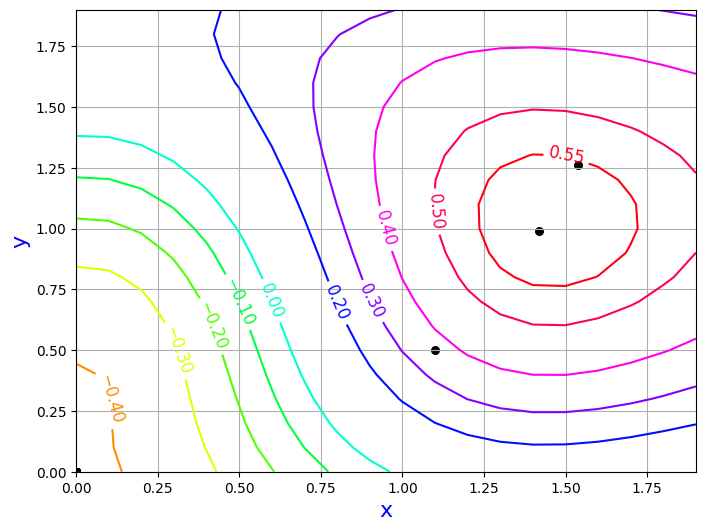

In [ ]:
# ここから結果のまとめ
x_result2=RecordNewton[:,0]
y_result2=RecordNewton[:,1]
F_result2=RecordNewton[:,2]

# グラフを表示する準備
fig2 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax2 = fig2.add_subplot()
# 軸ラベルを設定，ラベルの文字とフォントサイズと色
ax2.set_xlabel("x", size = 16, color = "blue")
ax2.set_ylabel("y", size = 16, color = "blue")

ax2.grid() # 罫線

Scat2 = ax2.scatter(x_result2,y_result2,c='k', s=30) # 繰り返し計算の軌跡
Cont3 = ax2.contour(X, Y, F0, cmap = "hsv", levels = hight) # 関数の等高線

# 等高線ラベルを設定
ax2.clabel(Cont3, fontsize = 12)

plt.show()
